In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_cleaned = pd.read_csv('data_cleaned.csv', index_col=None, low_memory=False)

In [3]:
data_cleaned.shape

(225201, 19)

In [4]:
data_cleaned.sample(5)

Unnamed: 0           code  \
27888        32571  0036800072077   
100129      118433  0613008725914   
196914      261616  4031446806211   
192016      250566  3700490807093   
155314      188118  3021690023985   

                                            product_name  \
27888                                              Salsa   
100129  Arnold Palmer, Half&Half Iced Tea Lemonade, Lite   
196914                      Asia mixed spicy ricecracker   
192016                   100% Pur Jus Pressé Multifruits   
155314                        cassoulet de castelnaudary   

                                            categories_fr  \
27888                                                 NaN   
100129                                                NaN   
196914           Snacks salés,Apéritif,Biscuits apéritifs   
192016  Aliments et boissons à base de végétaux,Boisso...   
155314                          Plats préparés,Cassoulets   

                  main_category_fr    pnns_groups_1   pnns_groups_2  \
27888                          NaN              NaN             NaN   
100129                         NaN              NaN             NaN   
196914                Snacks salés     Salty snacks      Appetizers   
192016  Jus de fruits 100% pur jus        Beverages    Fruit juices   
155314              Plats préparés  Composite foods  One-dish meals   

        energy_100g  proteins_100g  salt_100g  sodium_100g  sugars_100g  \
27888        75.000            0.0    0.97282     0.383000         3.33   
100129      100.000            0.0    0.01016     0.004000         5.59   
196914       31.892            7.2    1.20000     0.472441        16.00   
192016       37.600            0.4    0.01000     0.003937        10.00   
155314       73.600           10.5    0.81000     0.319000         1.19   

        fat_100g  carbohydrates_100g  saturated-fat_100g  \
27888       0.00               6.670                 0.0   
100129      0.00               6.180                 0.0   
196914     12.00              74.000                12.0   
192016      0.00              65.336                 0.0   
155314      6.19               8.570                 2.1   

        nutrition-score-fr_100g  nutrition-score-uk_100g  fiber_100g  \
27888                       3.2                      3.2        0.00   
100129                      1.0                      1.0        0.00   
196914                     23.0                     23.0        3.10   
192016                      4.0                      1.6        0.00   
155314                      0.6                      0.6        4.05   

       glycemic-index_100g  
27888                  NaN  
100129                 NaN  
196914                 NaN  
192016                 NaN  
155314                 NaN

# 1.Analyse univariée 

**1. Variables quantitatives** 

Nous avons visualisé dans la partie nettoyage les distributions de nos variables sélectionnées pour notre application et avons vu qu'elle ne suivent pas la loi normale. Nous alons compléter cette partie par une visualisation de leurs différents paramètres statistiques :  

In [146]:
data_cleaned[feature_col].describe()

energy_100g  proteins_100g      salt_100g    sodium_100g  \
count  225201.000000  225201.000000  225201.000000  225201.000000   
mean       44.139862       7.397971       1.312343       0.521344   
std        27.580367       7.949668       4.285119       1.764015   
min         0.000000       0.000000       0.000000       0.000000   
25%        20.000000       1.300000       0.100000       0.039370   
50%        41.400000       5.290000       0.645160       0.254899   
75%        67.020000      10.530000       1.380000       0.543000   
max       100.000000     100.000000     100.000000      92.500000   

         sugars_100g       fat_100g  carbohydrates_100g  saturated-fat_100g  \
count  225201.000000  225201.000000       225201.000000       225201.000000   
mean       15.675354      12.485466           34.316044            4.553073   
std        20.585898      15.692658           28.298504            7.065852   
min         0.000000       0.000000            0.000000            0.000000   
25%         1.600000       0.500000            8.240000            0.000000   
50%         5.830000       6.140000           26.140000            1.430000   
75%        23.440000      20.000000           59.720000            6.670000   
max       100.000000     100.000000          100.000000          100.000000   

       nutrition-score-fr_100g  nutrition-score-uk_100g     fiber_100g  
count            225201.000000            225201.000000  225201.000000  
mean                  9.934725                 9.804071       2.530348  
std                   7.794282                 7.959416       3.876149  
min                   0.000000                 0.000000       0.000000  
25%                   2.000000                 2.000000       0.000000  
50%                  10.000000                 9.000000       1.400000  
75%                  16.000000                16.000000       3.300000  
max                  40.000000                40.000000     100.000000

Nous allons à présent décomposer notre dataframe nettoyé en deux parties : les variables qualitatives et quantitatives 

In [5]:
# util_col : liste des colonnes contenant des informations utiles
util_col = ['code', 'product_name', 'categories_fr','main_category_fr', 'pnns_groups_1','pnns_groups_2']

# feature_col : liste des colonnes correspondant aux features
feature_col = ['energy_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'saturated-fat_100g',
       'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'fiber_100g']

# selected_feature_col : liste des colonnes correspondant aux features ayant à priori un lien avec notre application
selected_feature_col = ['sugars_100g', 'fat_100g', 'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g']

# target_col : notre colonne cible (de notre application) 
target_col = 'glycemic-index_100g'

In [6]:
data_cleaned[util_col].sample(10)

code                                       product_name  \
170437  3257982122894                               Biscottes 6 céréales   
37824   0041303063804               Kettle-Cooked Potato Chips, Original   
132136  0834190008863                                     Crispy Cookies   
160157  3168930007159         3D's Bugles goût Fromage (format familial)   
161922  3222471090909                   Crème glacée à la vanille Casino   
10002   0014700011105                           Butter Cookies, Original   
35315   0041250942269               Instant Oatmeal, Maple & Brown Sugar   
5611    0011152148748  Wasabi Flavored Rice Crackers & Peanuts, Wasab...   
180726  3396411221385                                 Boissons Végétales   
15272   0021130370955                              Chicken Cooking Stock   

                                            categories_fr main_category_fr  \
170437  Aliments et boissons à base de végétaux,Alimen...            Pains   
37824                                                 NaN              NaN   
132136                                                NaN              NaN   
160157  Snacks salés,Apéritif,Biscuits apéritifs,Biscu...     Snacks salés   
161922  Desserts,Surgelés,Desserts glacés,Glaces et so...           Glaces   
10002                                                 NaN              NaN   
35315                                                 NaN              NaN   
5611                                                  NaN              NaN   
180726                                                NaN              NaN   
15272                                                 NaN              NaN   

                  pnns_groups_1 pnns_groups_2  
170437     Cereals and potatoes         Bread  
37824                       NaN           NaN  
132136                      NaN           NaN  
160157             Salty snacks    Appetizers  
161922  Milk and dairy products     Ice cream  
10002                       NaN           NaN  
35315                       NaN           NaN  
5611                        NaN           NaN  
180726                      NaN           NaN  
15272                       NaN           NaN

 **2.   Les catégories de produits**
 
Intéressons nous à présent à la catégorisation des produits. 4 variables représentent cette catégorisation de manière plus ou moins précise : categories_fr, main_category_fr, pnns_groups_1, pnns_groups_2.

Nous remarquons un grands nombre
de catégories manquants. Regardons celles qui sont les plus représentées : 

In [7]:
def split_words(df, column = 'caregories_fr'):
  list_words = set()
  for word in df[column].str.split(','):
    if isinstance(word, float):
      continue
    list_words = set().union(word, list_words)
  return list(list_words)

In [8]:
categories = split_words(df = data_cleaned, column = 'categories_fr')
print("{} catégories sont représentées dans le jeu de données.".format(len(categories)))

10245 catégories sont représentées dans le jeu de données.


In [9]:
data_cleaned['categories_fr'] = np.where((data_cleaned['categories_fr'].isnull()==True), "unknown", 
                                 np.where(data_cleaned['categories_fr'] == "", "unknown", data_cleaned['categories_fr']))
data_cleaned['main_category_fr'] = np.where((data_cleaned['main_category_fr'].isnull()==True), "unknown", 
                                 np.where(data_cleaned['main_category_fr'] == "", "unknown", data_cleaned['main_category_fr']))
data_cleaned['pnns_groups_1'] = np.where((data_cleaned['pnns_groups_1'].isnull()==True), "unknown", 
                                 np.where(data_cleaned['pnns_groups_1'] == "", "unknown", data_cleaned['pnns_groups_1']))
data_cleaned['pnns_groups_2'] = np.where((data_cleaned['pnns_groups_2'].isnull()==True), "unknown", 
                                 np.where(data_cleaned['pnns_groups_2'] == "", "unknown", data_cleaned['pnns_groups_2']))

In [136]:
def top_words(df, column="categories_fr", nb_top=10):
  count_keyword = dict()
  for index, col in df[column].iteritems():
    if isinstance(col, float):
      continue
    for word in col.split(','):
      if word in count_keyword.keys():
        count_keyword[word] += 1
      else :
        count_keyword[word] = 1
  
  keyword_top = []
  for k,v in count_keyword.items():
    keyword_top.append([k,v])
  keyword_top.sort(key = lambda x:x[1], reverse = True)

  return keyword_top[:nb_top]

In [137]:
df_top_categories = pd.DataFrame(top_words(df=data_cleaned, column="categories_fr", nb_top=10), 
                                 columns=["Keyword","count"])
df_top_categories

Keyword   count
0                                  unknown  166531
1  Aliments et boissons à base de végétaux   18357
2              Aliments d'origine végétale   15519
3                            Snacks sucrés    9418
4                        Produits laitiers    7679
5              Céréales et pommes de terre    6713
6                           Plats préparés    6282
7                                 Boissons    5889
8                      Céréales et dérivés    5088
9  Aliments à base de fruits et de légumes    4883

Il y a un nombre important de catégorie non connues. Pour une meilleur visualisation, nous allons visualiser les 100 catégories les plus représentées dans un nuage de points. 

In [138]:
pip install wordcloud

In [139]:
from wordcloud import WordCloud
from PIL import Image

In [140]:

def plot_world_cloud(df=data_cleaned,column="categories_fr",nb_top=100):
  fig = plt.figure(1, figsize=(20,15))
  ax1 = fig.add_subplot(1,1,1)

  words = dict()
  trunc_occurences = top_words(df=df, column=column, nb_top=nb_top)
  for s in trunc_occurences:
    words[s[0]] = s[1]

  word_cloud = WordCloud(width=900,height=500, normalize_plurals=False,
                        background_color="white")
  word_cloud.generate_from_frequencies(words)
  ax1.imshow(word_cloud, interpolation="bilinear")
  ax1.axis('off')
  plt.title("Nuage de mots des {} meilleures {}\n".format(nb_top, column), fontsize=22)
  plt.savefig("Nuage_catégories.jpg")
  plt.show()
  

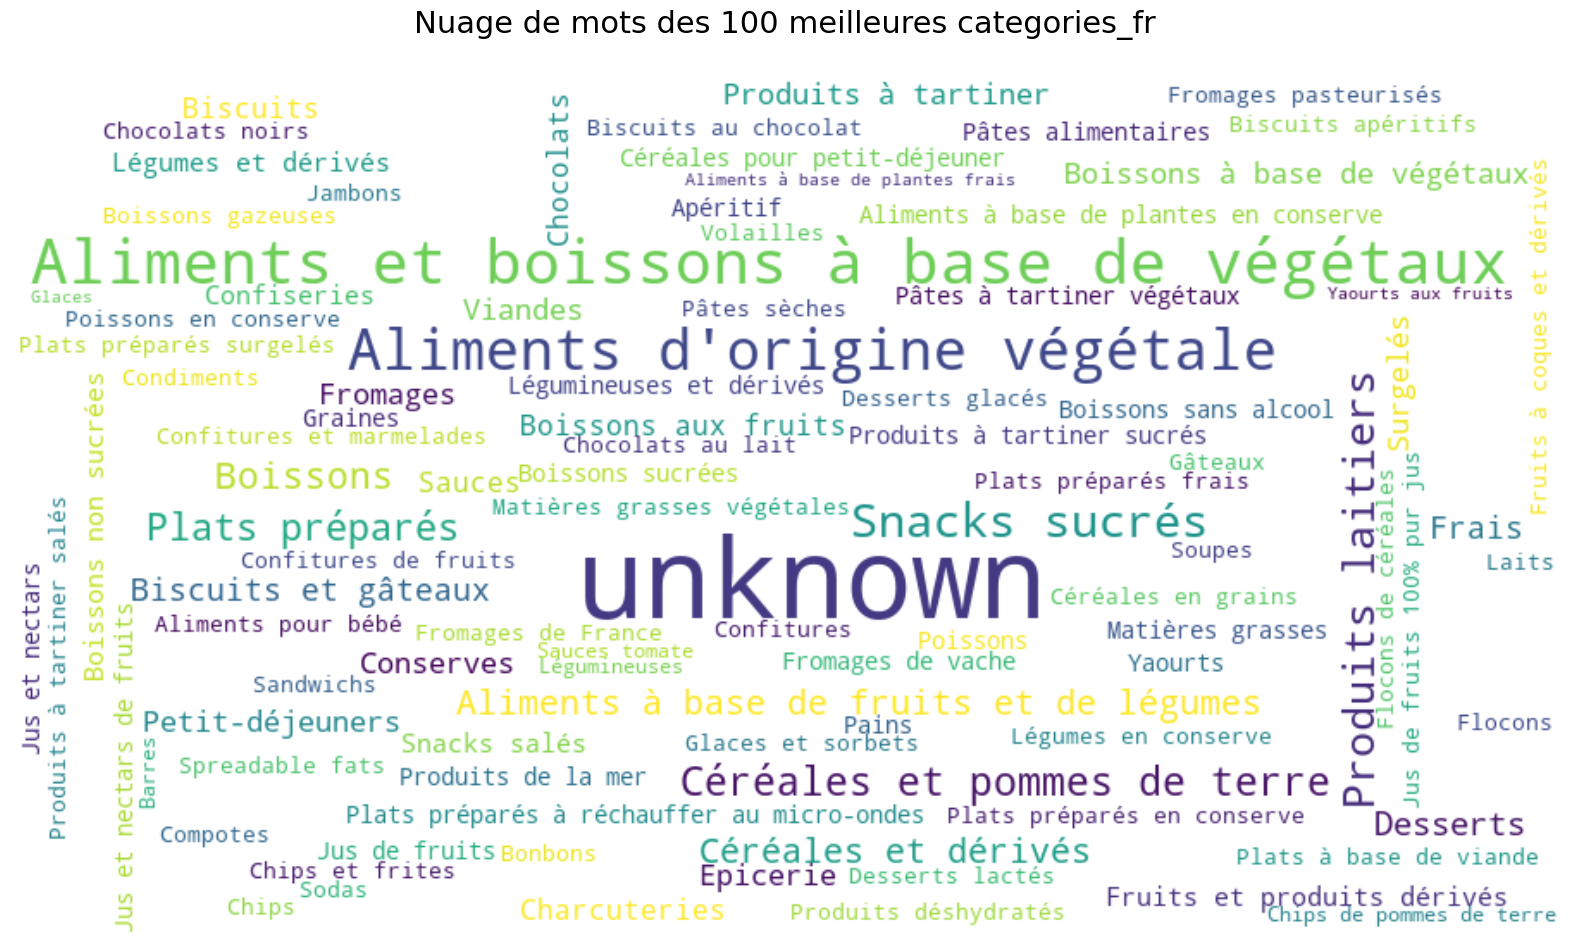

In [141]:
plot_world_cloud(df=data_cleaned,column="categories_fr",nb_top=100)

In [49]:
cat_Végétal=data_cleaned.loc[data_cleaned["categories_fr"].str.contains("végétaux")
                                  |data_cleaned["categories_fr"].str.contains("végétal")
                                  |data_cleaned["categories_fr"].str.contains("végétale")]
cat_Snacks=data_cleaned.loc[data_cleaned["categories_fr"].str.contains("Snacks")]
cat_Laitiers=data_cleaned.loc[data_cleaned["categories_fr"].str.contains("laitiers")]
cat_Céréales=data_cleaned.loc[data_cleaned["categories_fr"].str.contains("céréales")
                                  |data_cleaned["categories_fr"].str.contains("pommes de terre")]
cat_Plats=data_cleaned.loc[data_cleaned["categories_fr"].str.contains("préparés")]
num_Végétal,num_Snacks,num_Laitiers, num_Céréales, num_Plats=(cat_Végétal["categories_fr"].count(),
                                                            cat_Snacks["categories_fr"].count(),
                                                            cat_Laitiers["categories_fr"].count(),
                                                            cat_Céréales["categories_fr"].count(),
                                                            cat_Plats["categories_fr"].count())

In [50]:
from nose.tools import *

In [51]:
assert_is_not_none(cat_Végétal)
assert_is_not_none(cat_Snacks)
assert_is_not_none(cat_Laitiers)
assert_is_not_none(cat_Céréales)
assert_is_not_none(cat_Plats)
assert_greater(num_Végétal,0)
assert_greater(num_Snacks,0)
assert_greater(num_Laitiers,0)
assert_greater(num_Céréales,0)
assert_greater(num_Plats,0)


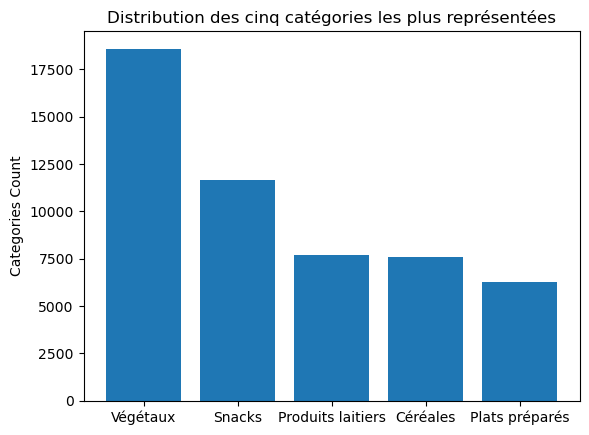

In [113]:
plt.title("Distribution des cinq catégories les plus représentées")
plt.bar(range(5), [num_Végétal,num_Snacks,num_Laitiers, num_Céréales, num_Plats ])
plt.xticks(range(5), ["Végétaux", "Snacks", "Produits laitiers", "Céréales", "Plats préparés"])
plt.ylabel("Categories Count")
plt.savefig("Distrib_catégories.png")
plt.show()


In [142]:
def top_words(df, column="main_category_fr", nb_top=10):
  count_keyword = dict()
  for index, col in df[column].iteritems():
    if isinstance(col, float):
      continue
    for word in col.split(','):
      if word in count_keyword.keys():
        count_keyword[word] += 1
      else :
        count_keyword[word] = 1
  
  keyword_top = []
  for k,v in count_keyword.items():
    keyword_top.append([k,v])
  keyword_top.sort(key = lambda x:x[1], reverse = True)

  return keyword_top[:nb_top]

In [143]:
df_main_category_fr = pd.DataFrame(top_words(df=data_cleaned, column="main_category_fr", nb_top=10), 
                                 columns=["Keyword","count"])
df_main_category_fr

Keyword   count
0                                  unknown  166531
1                                Chocolats    2275
2                                 Epicerie    2273
3                                 Boissons    2112
4  Aliments et boissons à base de végétaux    2066
5                                 Biscuits    1855
6                                Conserves    1808
7                           Plats préparés    1760
8                                 Surgelés    1590
9                          Petit-déjeuners    1587

In [53]:
def top_words(df, column="pnns_groups_1", nb_top=10):
  count_keyword = dict()
  for index, col in df[column].iteritems():
    if isinstance(col, float):
      continue
    for word in col.split(','):
      if word in count_keyword.keys():
        count_keyword[word] += 1
      else :
        count_keyword[word] = 1
  
  keyword_top = []
  for k,v in count_keyword.items():
    keyword_top.append([k,v])
  keyword_top.sort(key = lambda x:x[1], reverse = True)

  return keyword_top[:nb_top]

In [54]:
df_top_pnns_1 = pd.DataFrame(top_words(df=data_cleaned, column="pnns_groups_1", nb_top=10), 
                                 columns=["Keyword","count"])
df_top_pnns_1

Keyword   count
0                  unknown  173777
1            Sugary snacks    9747
2  Milk and dairy products    7345
3     Cereals and potatoes    7070
4                Beverages    5790
5          Composite foods    5779
6           Fish Meat Eggs    5261
7           Fat and sauces    3799
8    Fruits and vegetables    3419
9             Salty snacks    2301

In [144]:
def plot_world_cloud(df=data_cleaned,column="pnns_groups_1",nb_top=100):
  fig = plt.figure(1, figsize=(20,15))
  ax1 = fig.add_subplot(1,1,1)

  words = dict()
  trunc_occurences = top_words(df=df, column=column, nb_top=nb_top)
  for s in trunc_occurences:
    words[s[0]] = s[1]

  word_cloud = WordCloud(width=900,height=500, normalize_plurals=False,
                        background_color="white")
  word_cloud.generate_from_frequencies(words)
  ax1.imshow(word_cloud, interpolation="bilinear")
  ax1.axis('off')
  plt.title("Nuage de mots des {} meilleures {}\n".format(nb_top, column), fontsize=22)
  plt.savefig("Nuage_pnns_1.jpg")
  plt.show()

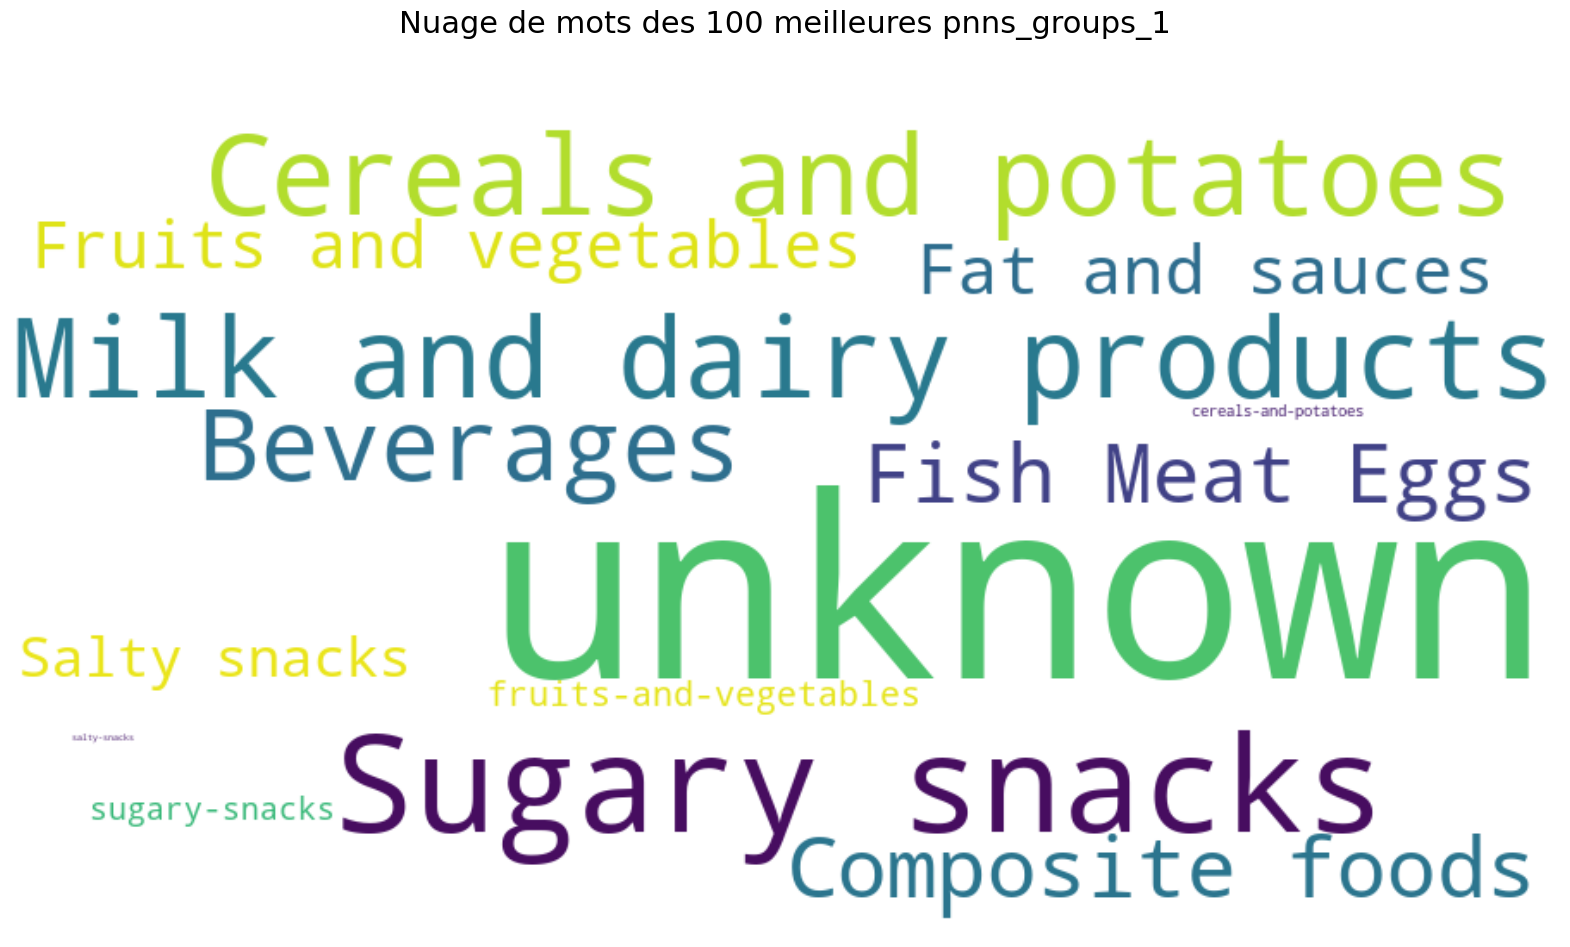

In [145]:
plot_world_cloud(df=data_cleaned,column="pnns_groups_1",nb_top=100)

In [55]:
def top_words(df, column="pnns_groups_2", nb_top=10):
  count_keyword = dict()
  for index, col in df[column].iteritems():
    if isinstance(col, float):
      continue
    for word in col.split(','):
      if word in count_keyword.keys():
        count_keyword[word] += 1
      else :
        count_keyword[word] = 1
  
  keyword_top = []
  for k,v in count_keyword.items():
    keyword_top.append([k,v])
  keyword_top.sort(key = lambda x:x[1], reverse = True)

  return keyword_top[:nb_top]

In [56]:
df_top_pnns_2 = pd.DataFrame(top_words(df=data_cleaned, column="pnns_groups_2", nb_top=10), 
                                 columns=["Keyword","count"])
df_top_pnns_2

Keyword   count
0               unknown  173646
1        One-dish meals    4678
2    Biscuits and cakes    3908
3               Cereals    3490
4                Sweets    3309
5                Cheese    3223
6       Milk and yogurt    2790
7  Dressings and sauces    2571
8    Chocolate products    2530
9        Processed meat    2339

Nous remarquons que les catégories les plus représentées dans les colonnes categories_fr et pnns_groups_1 alors que la colonnes pnns_groups_2 peut être considérée comme complémentaire

In [57]:
data_cleaned[feature_col].head(5)

energy_100g  proteins_100g  salt_100g  sodium_100g  sugars_100g  fat_100g  \
0       27.800           3.57   0.000000     0.000000        14.29     28.57   
1       59.400          17.86   0.635000     0.250000        17.86     17.86   
2       13.800          17.86   1.224280     0.482000         3.57     57.14   
3       23.692           8.57   2.046556     0.805731         6.19      1.43   
4       31.600          13.46   1.089296     0.428857        11.54     18.27   

   carbohydrates_100g  saturated-fat_100g  nutrition-score-fr_100g  \
0               64.29               28.57                     14.0   
1               60.71                0.00                      0.0   
2               17.86                5.36                     12.0   
3               77.14                0.12                      7.8   
4               63.46                1.92                      6.8   

   nutrition-score-uk_100g  fiber_100g  
0                     14.0         3.6  
1                      0.0         7.1  
2                     12.0         7.1  
3                      7.8         5.7  
4                      6.8         7.7

Revenons maintenant sur nos variables quantitatives. Le tableau suivant visualise les critères de 

In [59]:
# Nombre de lignes remplies par l'indice glycémique
data_cleaned['glycemic-index_100g'].notnull().sum()

6369

In [60]:
data_cleaned['glycemic-index_100g'].sample(5)

123762    NaN
156310    NaN
33251     NaN
137792    NaN
74265     NaN
Name: glycemic-index_100g, dtype: object

In [61]:
data_IG = data_cleaned.loc[data_cleaned['glycemic-index_100g'].notnull(), :]

In [62]:
data_IG.shape

(6369, 19)

**Répartition des Classes (remplies) de l'Indice Glycémique**

In [63]:
# Pourcentages des classes IG (Répartition)

print('Nombre totale des lignes remplies : ', data_IG.shape[0])
print('Nombre des lignes remplies avec un indice glycémique élevé : ', data_IG[data_IG['glycemic-index_100g']=='élevé'].shape[0])
print('Nombre des lignes remplies avec un indice glycémique moyen : ', data_IG[data_IG['glycemic-index_100g']=='moyen'].shape[0])
print('Nombre des lignes remplies avec un indice glycémique faible : ', data_IG[data_IG['glycemic-index_100g']=='faible'].shape[0])

Nombre totale des lignes remplies :  6369
Nombre des lignes remplies avec un indice glycémique élevé :  2363
Nombre des lignes remplies avec un indice glycémique moyen :  1796
Nombre des lignes remplies avec un indice glycémique faible :  2210


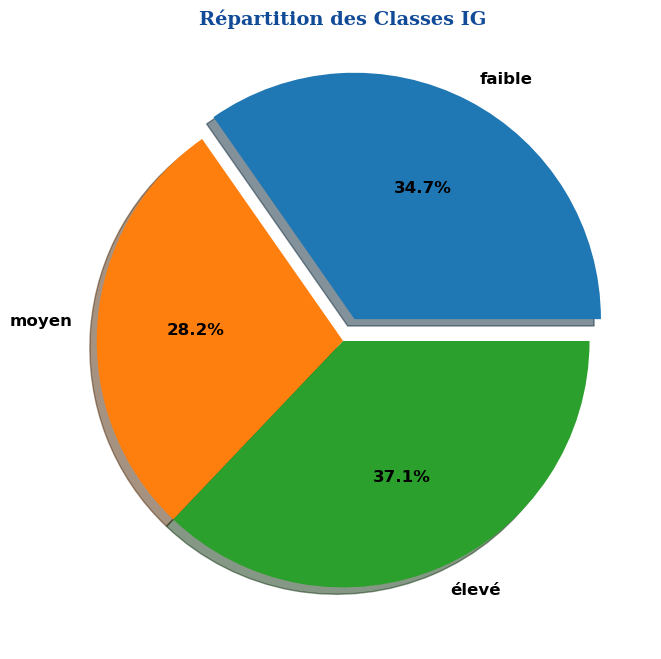

In [114]:
# Visualisation des pourcentages des classes IG (Répartition)

IG_classe_percentage = data_IG.groupby(by='glycemic-index_100g')['code'].nunique()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

explodes = np.zeros(3)
explodes[0] = .1

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 14,
             }

plt.pie(IG_classe_percentage, labels=IG_classe_percentage.index, 
        startangle=0, 
        shadow=True,
        explode=explodes,
        autopct='%1.1f%%',
        textprops=dict(color="black",size=12, weight="bold"))
plt.title("Répartition des Classes IG", fontdict=font_title)
plt.savefig("cercle_poucentage_IG.png")
plt.show()


**3. ANOVA**

Nous allons à présents vérifier la dépendance entre nos variables qualitatives et l'indice glycémique : 

In [65]:
import scipy.stats as stat

In [66]:
# ANOVA DES 11 FEATURES PAR RAPPORT A L'IG

modalities = data_IG['glycemic-index_100g'].unique()
results = []

for feature in feature_col:
    st, p_value = stat.f_oneway(*[list(data_IG.loc[data_IG['glycemic-index_100g'] == m, feature]) for m in modalities])
    if p_value < 0.05:
        results.append([feature, p_value, 'rejetée', 'Oui'])
    else:        
        results.append([feature, p_value, 'acceptée', 'Non'])

anova_results = pd.DataFrame(results, columns=['Feature', 'p_value', 'H0 : Indépendance', 'H1 : Dépendance'])
anova_results.sort_values(by=['p_value'])

Feature        p_value H0 : Indépendance H1 : Dépendance
6        carbohydrates_100g   0.000000e+00           rejetée             Oui
4               sugars_100g  1.185331e-110           rejetée             Oui
9   nutrition-score-uk_100g   3.409049e-75           rejetée             Oui
8   nutrition-score-fr_100g   1.055831e-65           rejetée             Oui
7        saturated-fat_100g   1.141744e-55           rejetée             Oui
2                 salt_100g   6.640275e-37           rejetée             Oui
3               sodium_100g   1.617081e-36           rejetée             Oui
0               energy_100g   2.409414e-34           rejetée             Oui
5                  fat_100g   1.633276e-31           rejetée             Oui
1             proteins_100g   1.850781e-22           rejetée             Oui
10               fiber_100g   2.074377e-10           rejetée             Oui

**4. KNN en utilisant tous les features (les 11 ingrédients)**

In [116]:
# KNN en utilisant les 11 features

from sklearn.model_selection import train_test_split

features = data_IG[feature_col]
target = data_IG[target_col]
xtrain, xtest, ytrain, ytest = train_test_split(features, target, train_size=0.8)

C:\Users\ah92\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ah92\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

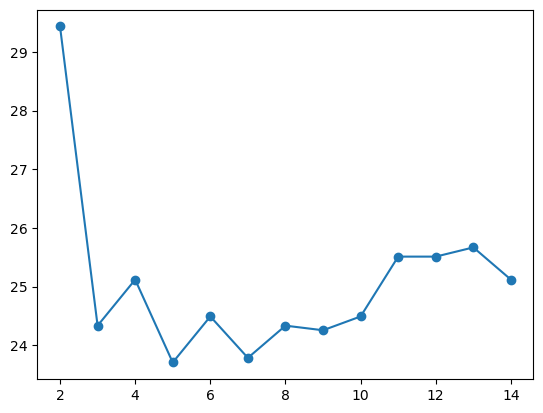

In [118]:
from sklearn import neighbors

errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.savefig("knn_11_features.png")
plt.show()


In [119]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [70]:
error = (1 - knn.score(xtest, ytest)) * 100
print('Erreur : {} %'.format(error))

Erreur : 24.254317111459965 %


C:\Users\ah92\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


**KNN en utilisant les features ayant "à priori" une relation avec l'indice glycémique**

C:\Users\ah92\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ah92\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

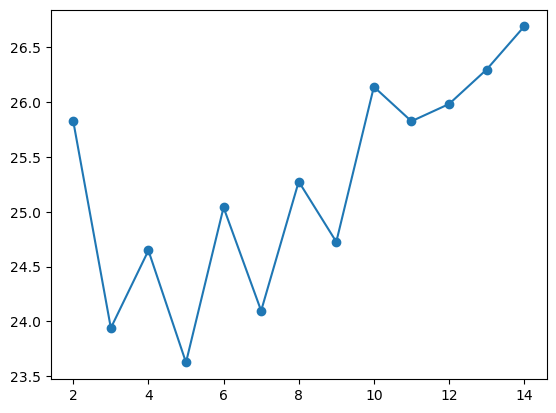

In [120]:
# KNN en utilisant les features sélectionnées "à la main"

features = data_IG[selected_feature_col]
target = data_IG[target_col]
xtrain, xtest, ytrain, ytest = train_test_split(features, target, train_size=0.8)

errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.savefig("knn_5_features.png")
plt.show()


In [72]:
knn = neighbors.KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=4)

In [73]:
error = (1 - knn.score(xtest, ytest)) * 100
print('Erreur : {} %'.format(error))

Erreur : 22.919937205651486 %


C:\Users\ah92\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# 2.Analyse multivariée : 

**1. ANALYSE DES CORRELATIONS**

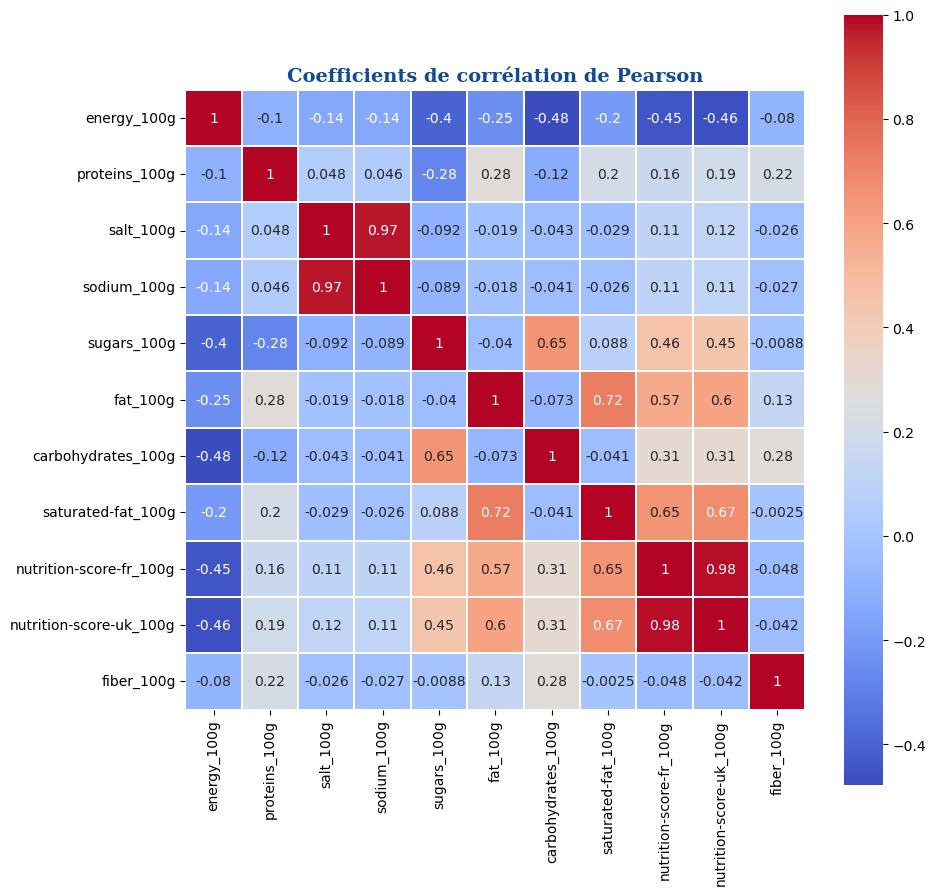

In [121]:
# ANALYSE DES CORRELATIONS
#Matrice des corrélations
corr_mat = data_cleaned[feature_col].corr()
#heatmap
fig = plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, square=True, linewidths=0.01, annot=True, cmap='coolwarm')
plt.title("Coefficients de corrélation de Pearson", fontdict=font_title)
plt.savefig("coeff_corr.png")
plt.show()


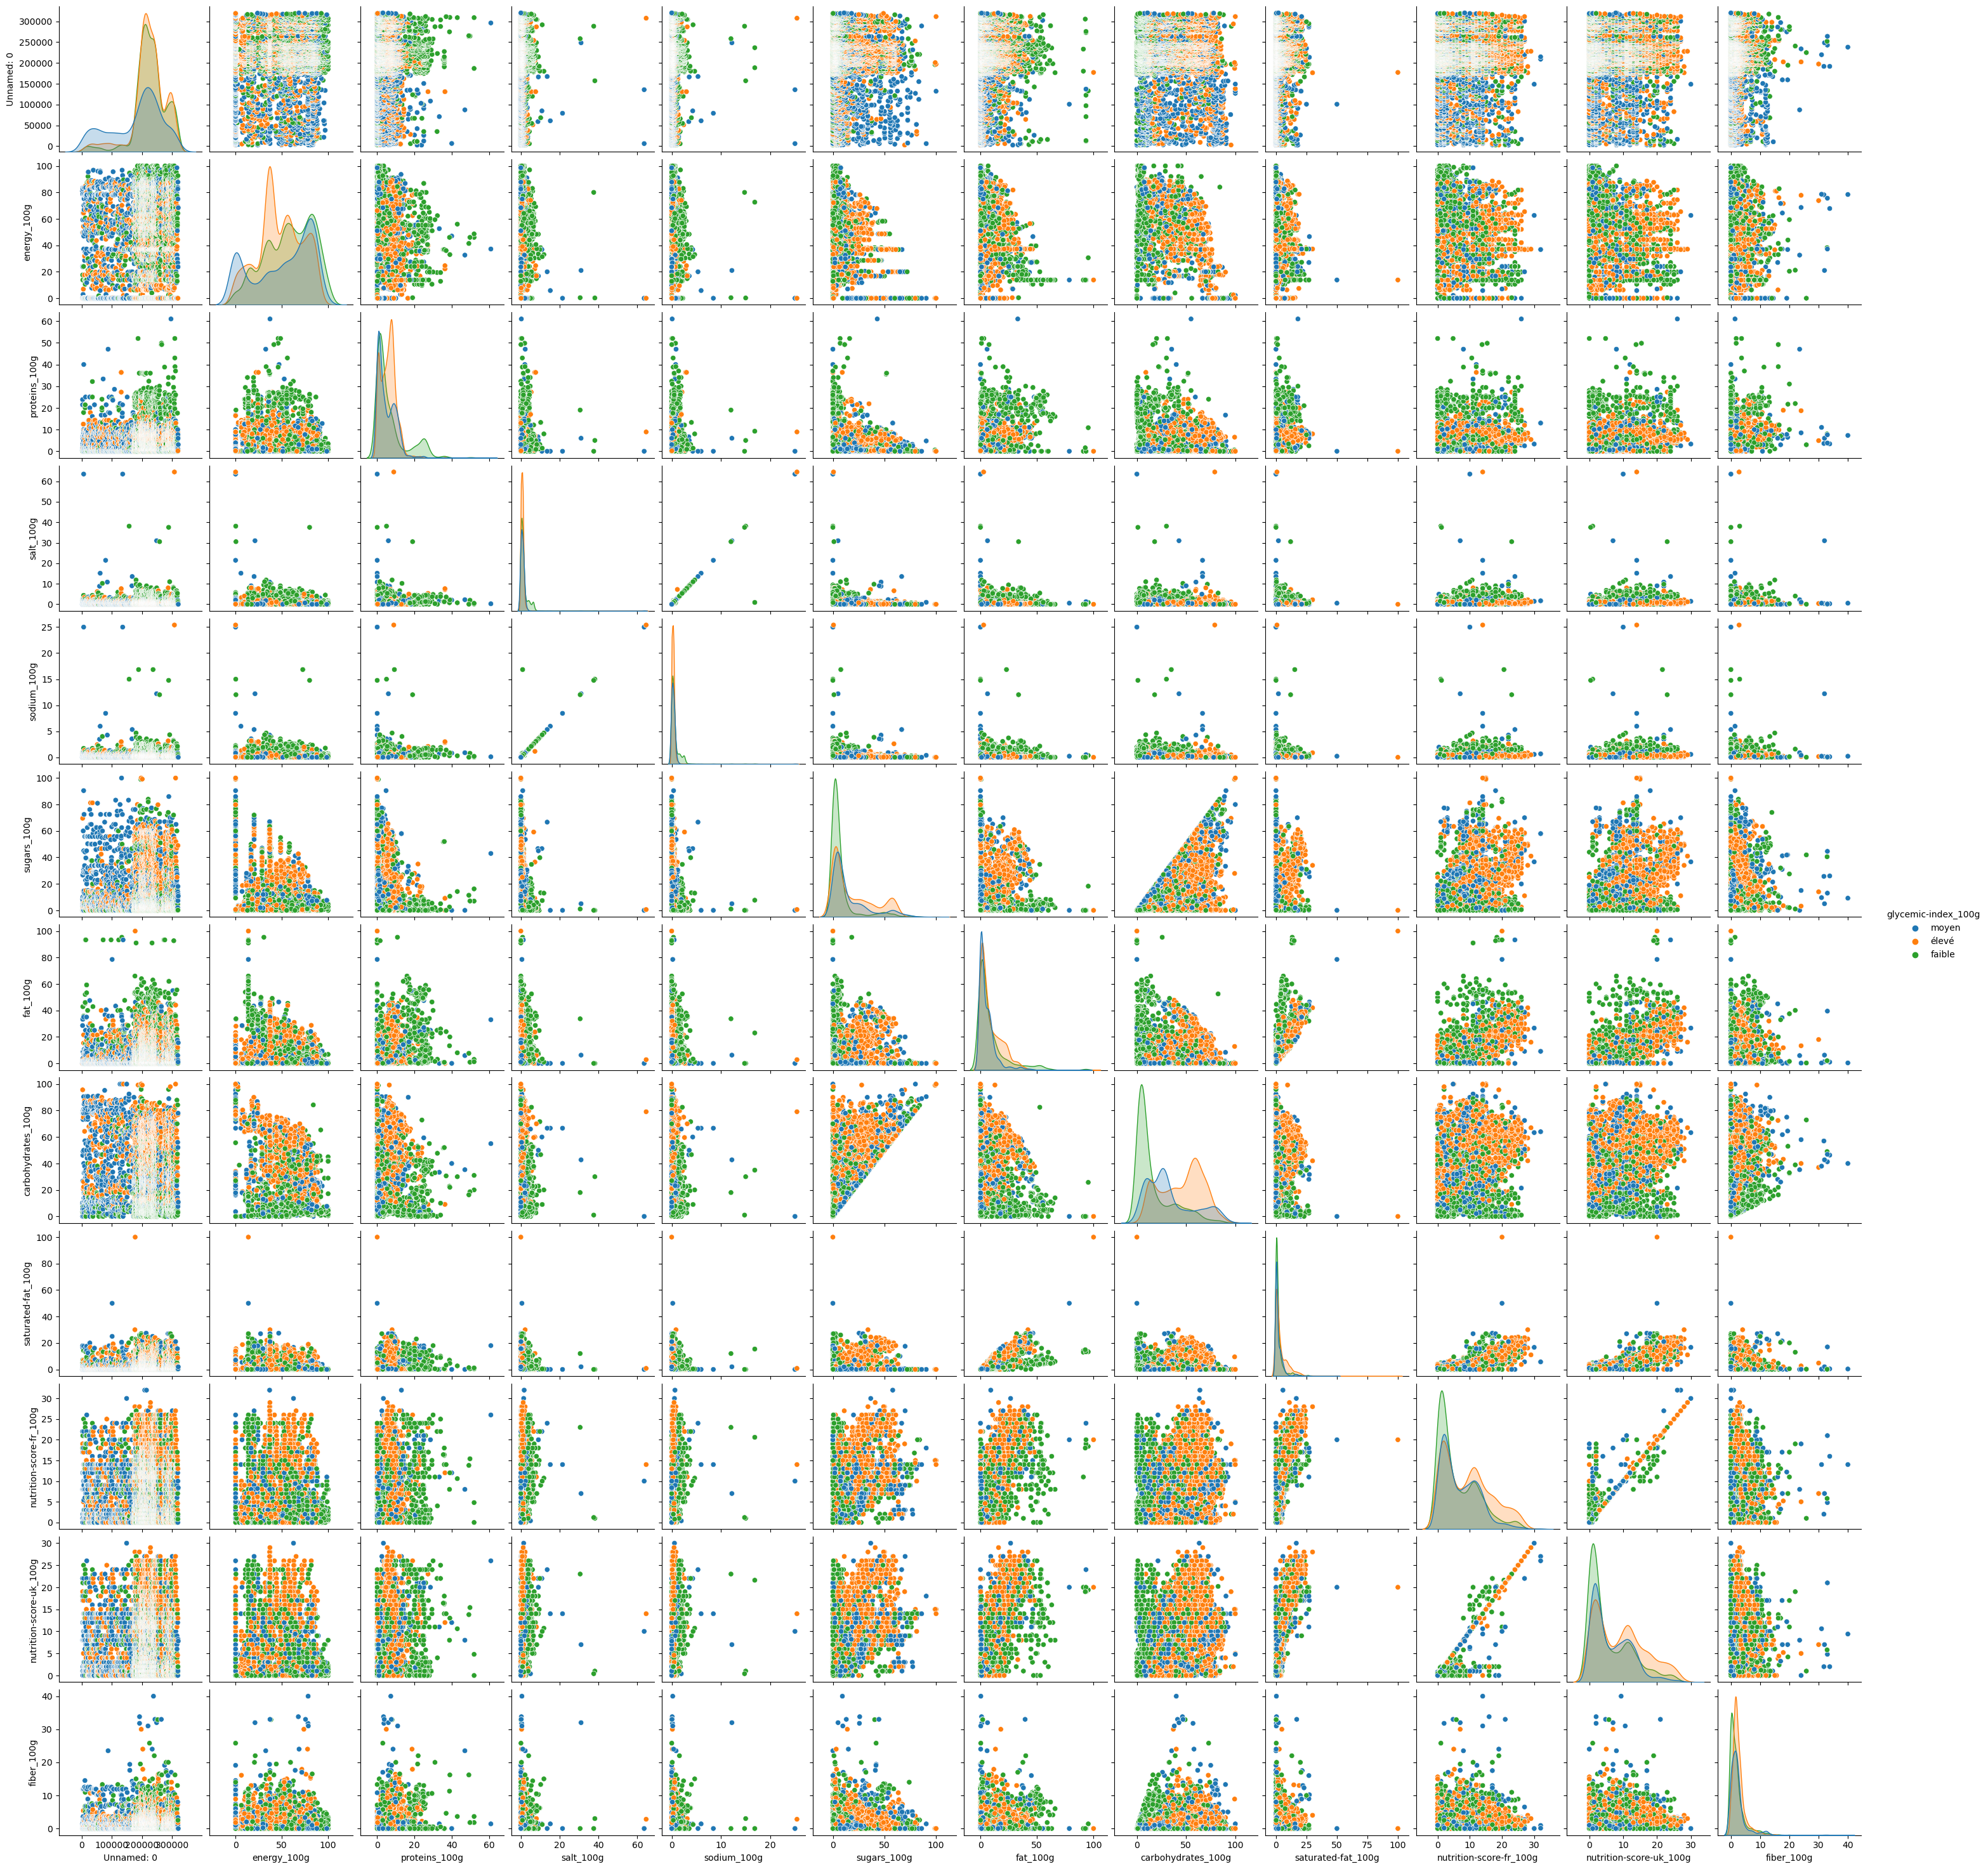

In [123]:
sns.pairplot(data_IG[7:], hue = 'glycemic-index_100g')
plt.savefig("nuage_features_IG.png")

**2. UTILISATION DE L'ACP**

In [77]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Centrage et réduction
#X = data_cleaned[selected_feature_col]
X = data_cleaned[feature_col]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Instanciation de l'ACP
pca = PCA(svd_solver='full').fit(X_scaled)
X_projected = pca.transform(X_scaled)

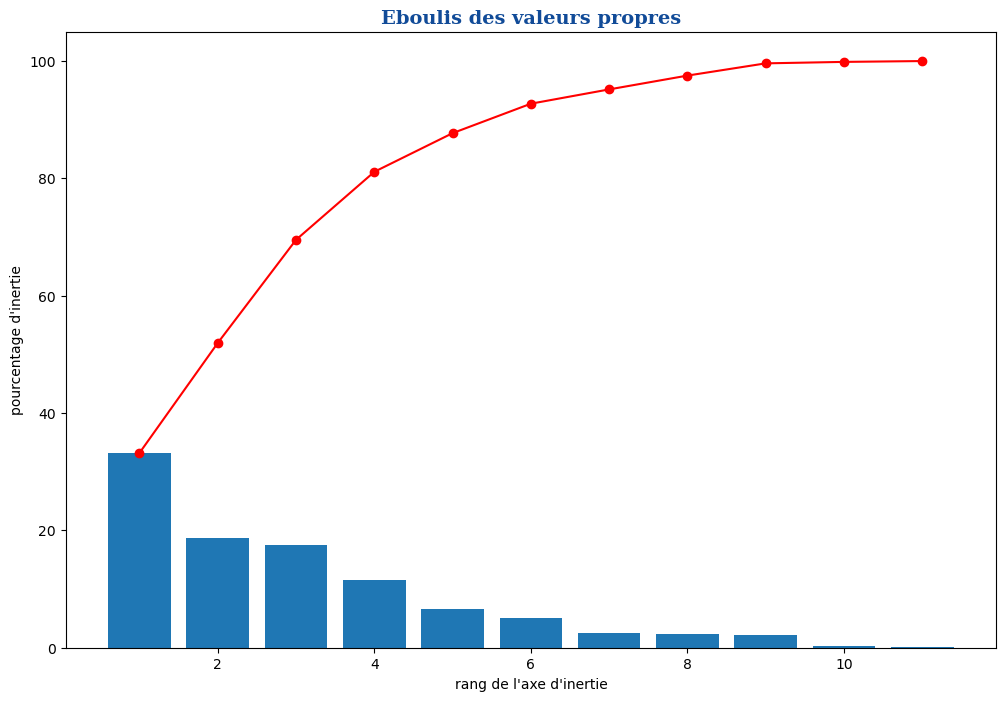

<Figure size 640x480 with 0 Axes>

In [78]:
#Variances expliquées
varexpl = pca.explained_variance_ratio_*100

#Projection de l'éboulis des valeurs propres
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)
plt.plot(np.arange(len(varexpl))+1, varexpl.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres", fontdict=font_title)
plt.show(block=False)
plt.savefig("eboulis_vp.jpg")

In [79]:
print("Le premier plan factoriel couvrira une inertie de {:.2f}% et le second plan : {:.2f}%.".format(varexpl[0:2].sum(),
                                                                                                     varexpl[0:4].sum()))

Le premier plan factoriel couvrira une inertie de 51.95% et le second plan : 81.12%.


In [80]:
# CERCLE DES CORRELATIONS

#Espace des composantes principales
pcs = pca.components_

#Matrice des corrélations variables x facteurs
p = X.shape[1]
sqrt_valprop = np.sqrt(pca.explained_variance_)
corvar = np.zeros((p, p))
for dim in range(p):
    corvar[:,dim] = pcs[dim,:] * sqrt_valprop[dim]

#on affiche pour les deux premiers plans factoriels 
corr_matrix = pd.DataFrame({'feature':X.columns,'CORR_F1':corvar[:,0],'CORR_F2':corvar[:,1], 
              'CORR_F3':corvar[:,2], 'CORR_F4':corvar[:,3]})
#corr_matrix = pd.DataFrame({'feature':X.columns,'CORR_F1':corvar[:,0],'CORR_F2':corvar[:,1], 
#              'CORR_F3':corvar[:,2]})
corr_matrix
#plt.savefig("vecteursF_i")

feature   CORR_F1   CORR_F2   CORR_F3   CORR_F4
0               energy_100g -0.615293  0.108599 -0.351238 -0.197242
1             proteins_100g  0.213289  0.336280 -0.387053  0.543054
2                 salt_100g  0.126195  0.803559  0.561901  0.001786
3               sodium_100g  0.125731  0.802081  0.562244  0.000085
4               sugars_100g  0.499193 -0.555328  0.487501 -0.146385
5                  fat_100g  0.676958  0.206828 -0.513259  0.056405
6        carbohydrates_100g  0.419016 -0.516632  0.554521  0.296075
7        saturated-fat_100g  0.726162  0.148210 -0.467043 -0.143707
8   nutrition-score-fr_100g  0.937130  0.016944 -0.026523 -0.162938
9   nutrition-score-uk_100g  0.949666  0.031157 -0.041368 -0.144206
10               fiber_100g  0.077278 -0.085009 -0.001617  0.872198

In [124]:
# CERCLE DES CORRELATIONS

def cerle_corr(pcs, n_comp, pca, axis_ranks, 
               labels=None, label_rotation=0, 
               illustrative_var_label=None, illustrative_var_corr=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:
            
            # initialisation de la figure
            fig=plt.figure(figsize=(10,10))
            fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=fig.add_subplot(111)
            ax.set_aspect('equal', adjustable='box') 

            #détermination des limites du graphique
            ax.set_xlim(-1,1) 
            ax.set_ylim(-1,1) 

            #affichage des flèches 
            plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                       pcs[d1,:],pcs[d2,:], 
                       angles='xy', scale_units='xy', scale=1, 
                       color="grey", alpha=0.5)
            # et noms de variables
            for i,(x,y) in enumerate(pcs[[d1,d2]].T):
                plt.annotate(labels[i],(x,y),
                             ha='center', va='center',
                             fontsize='14',color="#17aafa", alpha=0.8) 

            #variable illustrative
            if illustrative_var_label is not None :
                plt.annotate(illustrative_var_label,
                             (illustrative_var_corr[0,d1],illustrative_var_corr[0,d2]),
                             color='g')
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                                   illustrative_var_corr[0,d1],illustrative_var_corr[0,d2], 
                                   angles='xy', scale_units='xy', scale=1, color="g", alpha=0.5)

            #ajouter les axes 
            plt.plot([-1,1],[0,0],linewidth=1, color='grey', ls='--') 
            plt.plot([0,0],[-1,1],linewidth=1, color='grey', ls='--')

            #ajouter un cercle 
            cercle = plt.Circle((0,0),1,color='#17aafa',fill=False) 
            ax.add_artist(cercle) 

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1), fontdict=font_title)
            plt.savefig("cercles_corr_F12.jpg")
            #, format=None, bbox_inches=None, pad_inches=0.1,
                                                #facecolor='auto', edgecolor='auto', backend=None)
            plt.show(block=False)
            

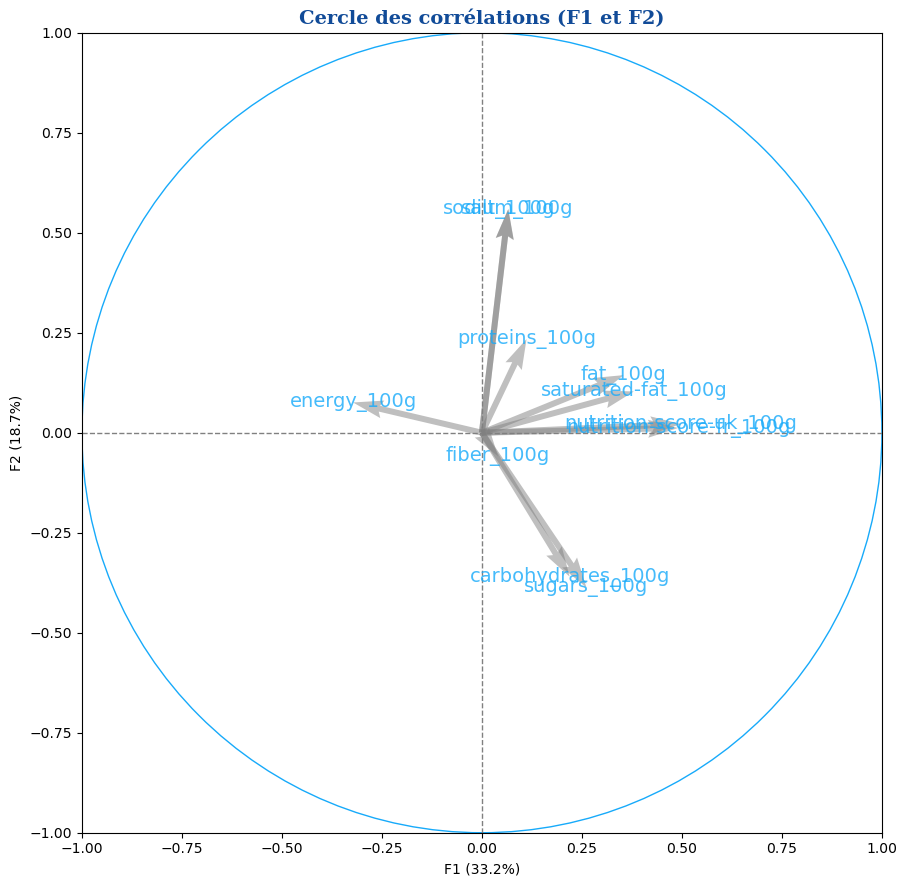

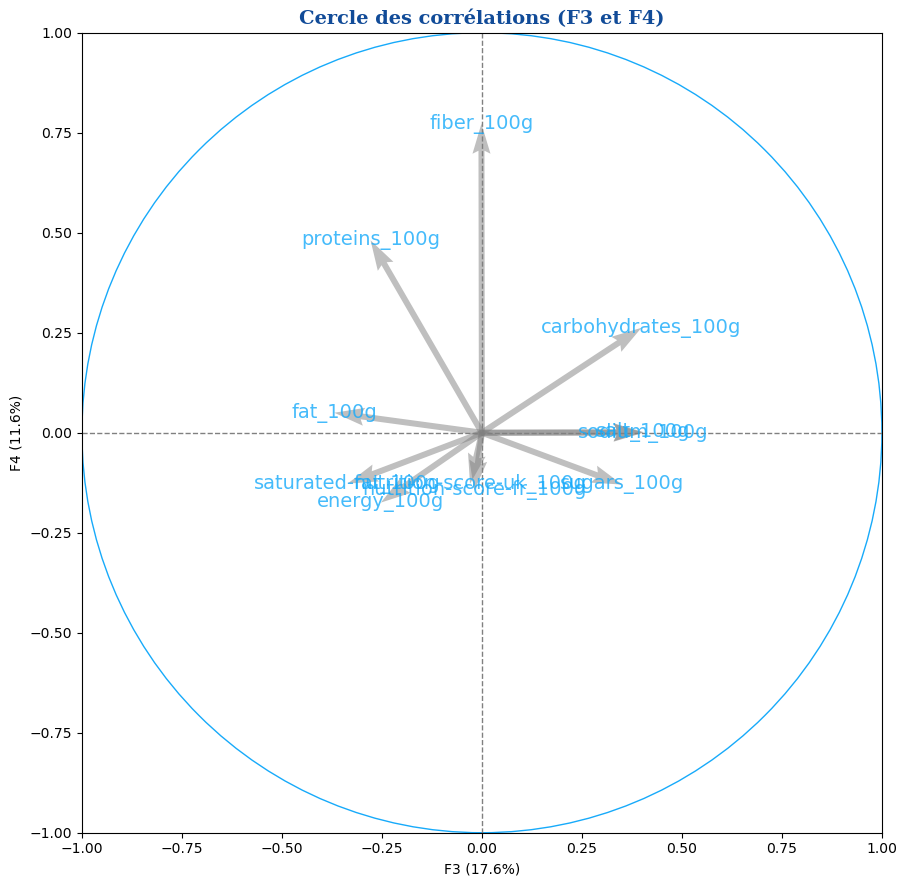

In [125]:
cerle_corr(pcs, 4, pca, [(0,1),(2,3)], labels = np.array(X.columns))

In [147]:
# PROJECTION DES INDIVIDUS

def plot_plans_factoriels(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(12,8))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
            
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des {} individus sur F{} et F{}".format(X_projected.shape[0], d1+1, d2+1), fontdict=font_title)
            plt.show(block=False)
            

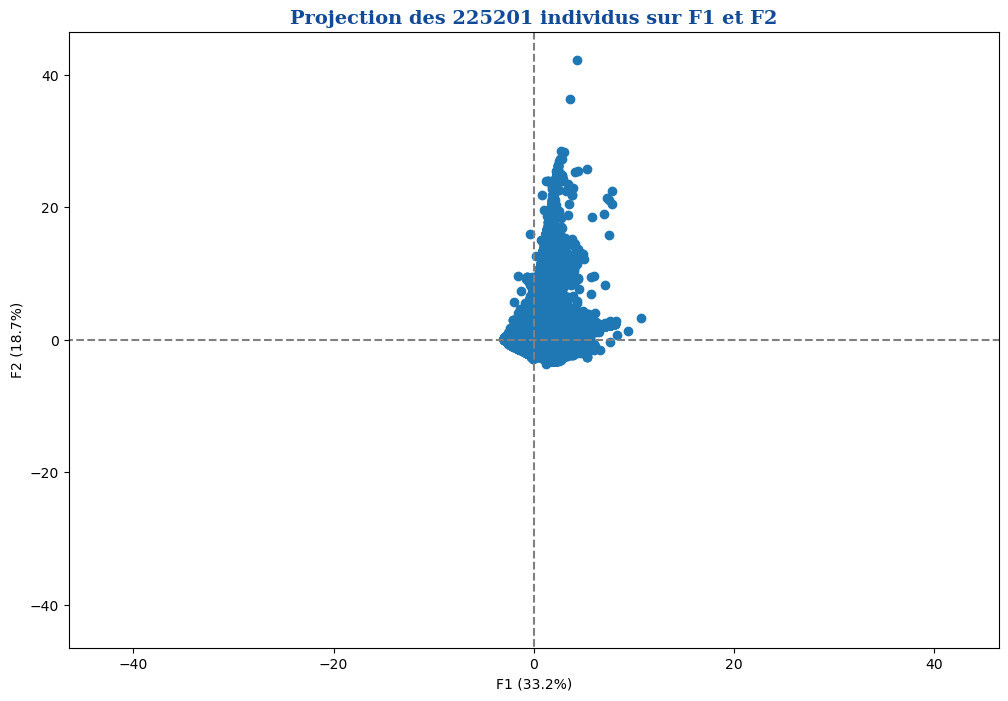

In [148]:
plot_plans_factoriels(X_projected, 3, pca, [(0,1),(2,3)])

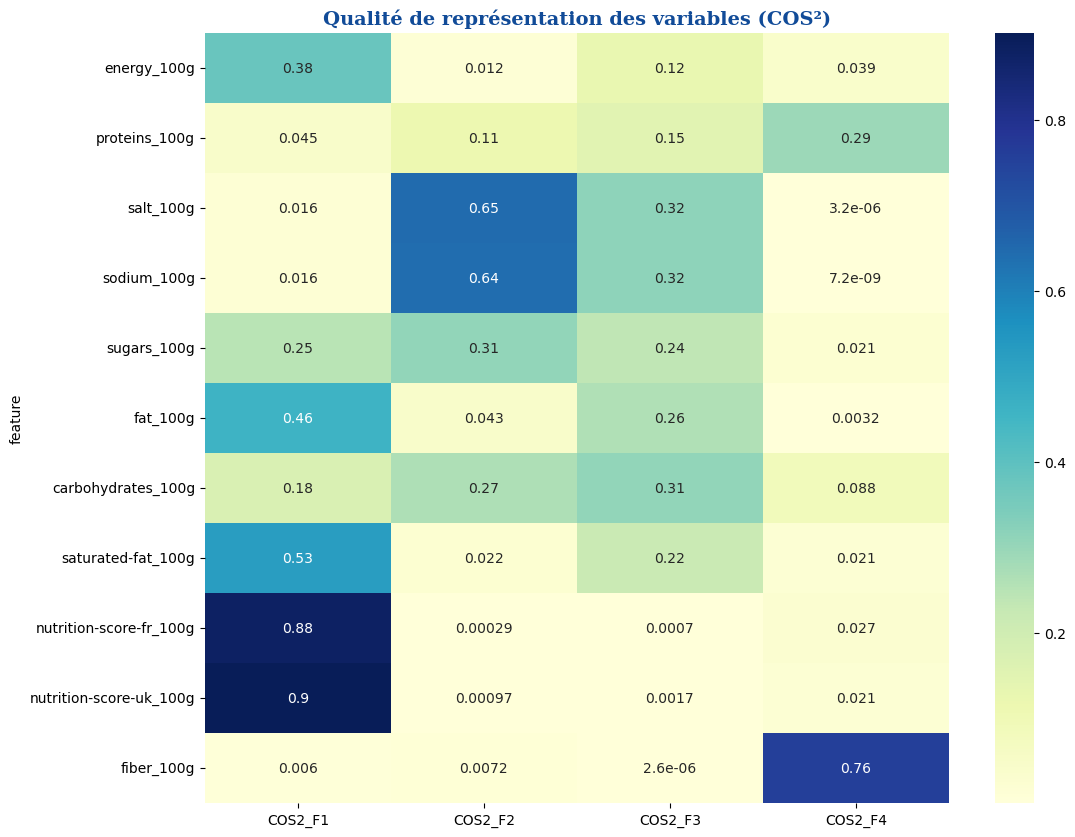

In [107]:
# QUALITE DES REPRESENTATIONS DES VARIABLES

#Calcul des COS²
cos2var = corvar**2
df_cos2var = pd.DataFrame({'feature':X.columns,'COS2_F1':cos2var[:,0],
                           'COS2_F2':cos2var[:,1], 'COS2_F3':cos2var[:,2],
                           'COS2_F4':cos2var[:,3]}).set_index('feature')

#df_cos2var = pd.DataFrame({'feature':X.columns,'COS2_F1':cos2var[:,0],
#                           'COS2_F2':cos2var[:,1], 'COS2_F3':cos2var[:,2]}).set_index('feature')

#affichage dans un heatmap seaborn
fig = plt.figure(figsize=(12,10))
sns.heatmap(df_cos2var, annot=True, cmap="YlGnBu")
plt.title("Qualité de représentation des variables (COS²)", fontdict=font_title)
plt.savefig("qualité_représentation.png")
plt.show()


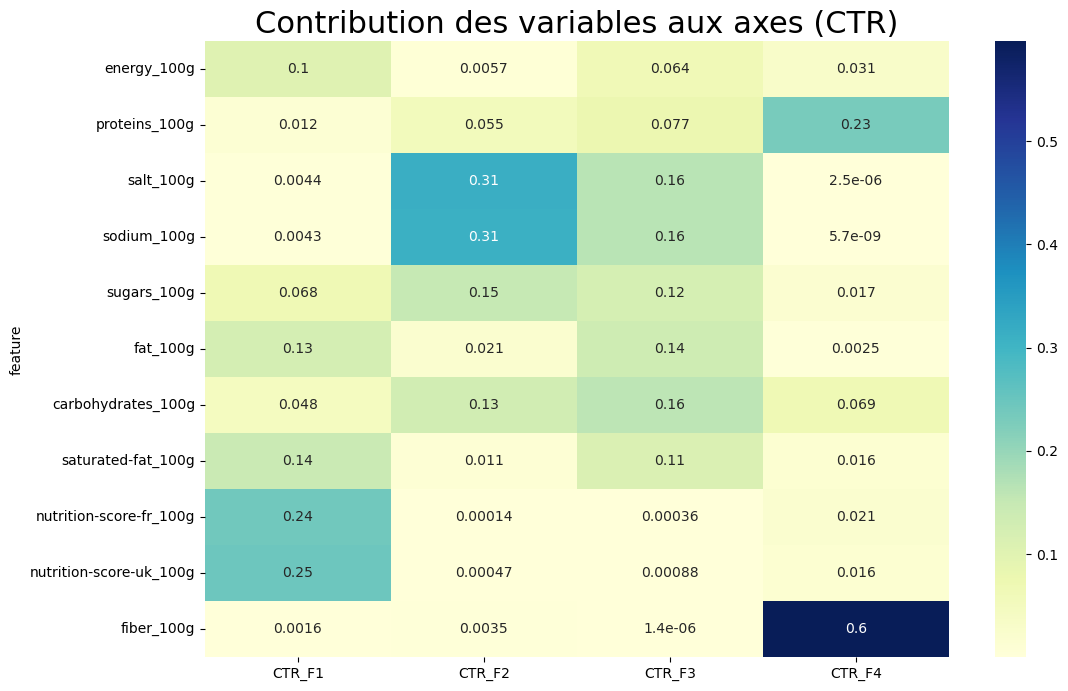

In [108]:
#contributions 
ctrvar = cos2var 
for k in range(p): 
    ctrvar[:,k] = ctrvar[:,k]/pca.explained_variance_[k] 

df_ctrvar = pd.DataFrame({'feature':X.columns,'CTR_F1':ctrvar[:,0],'CTR_F2':ctrvar[:,1],
                         'CTR_F3':ctrvar[:,2], 'CTR_F4':ctrvar[:,3]}).set_index('feature')

#df_ctrvar = pd.DataFrame({'feature':X.columns,'CTR_F1':ctrvar[:,0],'CTR_F2':ctrvar[:,1],
#                         'CTR_F3':ctrvar[:,2]}).set_index('feature')

#affichage dans un heatmap seaborn
fig = plt.figure(figsize=(12,8))
sns.heatmap(df_ctrvar, annot=True, cmap="YlGnBu")
plt.title("Contribution des variables aux axes (CTR)", fontsize=22)
plt.savefig("contribution_var.png")
plt.show()


In [109]:
# AJOUTER LES VARIABLES SYNTHETIQUES A NOTRES DATAFRAME

df_syn_var = pd.DataFrame(X_projected[:,:4], index=data_cleaned.index, 
                          columns=["F"+str(i+1) for i in range(4)])
#df_syn_var = pd.DataFrame(X_projected[:,:3], index=data_cleaned.index, 
#                          columns=["F"+str(i+1) for i in range(3)])
data_extend = pd.concat([data_cleaned, df_syn_var], axis=1)
data_extend.head()

Unnamed: 0           code                       product_name categories_fr  \
0           1  0000000004530     Banana Chips Sweetened (Whole)       unknown   
1           2  0000000004559                            Peanuts       unknown   
2           3  0000000016087             Organic Salted Nut Mix       unknown   
3           4  0000000016094                    Organic Polenta       unknown   
4           5  0000000016100  Breadshop Honey Gone Nuts Granola       unknown   

  main_category_fr pnns_groups_1 pnns_groups_2  energy_100g  proteins_100g  \
0          unknown       unknown       unknown       27.800           3.57   
1          unknown       unknown       unknown       59.400          17.86   
2          unknown       unknown       unknown       13.800          17.86   
3          unknown       unknown       unknown       23.692           8.57   
4          unknown       unknown       unknown       31.600          13.46   

   salt_100g  ...  carbohydrates_100g  saturated-fat_100g  \
0   0.000000  ...               64.29               28.57   
1   0.635000  ...               60.71                0.00   
2   1.224280  ...               17.86                5.36   
3   2.046556  ...               77.14                0.12   
4   1.089296  ...               63.46                1.92   

   nutrition-score-fr_100g  nutrition-score-uk_100g  fiber_100g  \
0                     14.0                     14.0         3.6   
1                      0.0                      0.0         7.1   
2                     12.0                     12.0         7.1   
3                      7.8                      7.8         5.7   
4                      6.8                      6.8         7.7   

   glycemic-index_100g        F1        F2        F3        F4  
0                  NaN  2.495500 -0.349341 -1.106530 -0.152974  
1                  NaN -1.132584 -0.329644 -0.073386  2.117967  
2                  NaN  1.583208  0.998531 -1.646905  1.713712  
3                  NaN -0.225789 -0.425160  1.204940  1.405310  
4                  NaN  0.056077 -0.284293  0.207049  1.944582  

[5 rows x 23 columns]

**KNN en utilisant les features synthétiques (les 4 composantes principales issues de l'ACP)**

C:\Users\ah92\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ah92\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

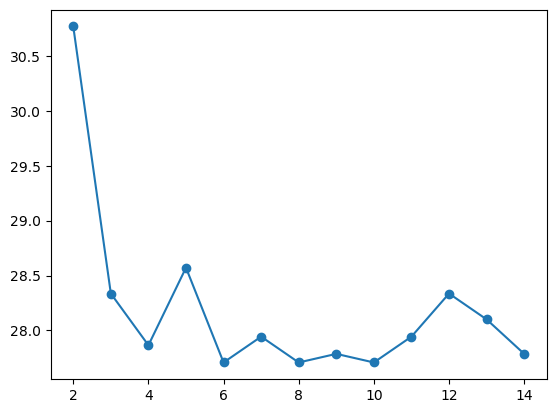

In [110]:
# KNN en utilisant les features synthétiques issues de l'ACP

data_IG_2 = data_extend.loc[data_extend['glycemic-index_100g'].notnull(), :]

features = data_IG_2[["F"+str(i+1) for i in range(4)]]
#features = data_IG_2[["F"+str(i+1) for i in range(3)]]
target = data_IG_2[target_col]
xtrain, xtest, ytrain, ytest = train_test_split(features, target, train_size=0.8)

errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.savefig("knn_acp.png")
plt.show()


In [89]:
knn = neighbors.KNeighborsClassifier(n_neighbors=6)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=6)

In [90]:
error = (1 - knn.score(xtest, ytest)) * 100
print('Erreur : {} %'.format(error))

Erreur : 28.10047095761381 %


C:\Users\ah92\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
